In [54]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_fb3be15dcd984547a2bdab2d18d31654 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1XjZ3aqZzmlh0BF1AVpdFwoF95WQ3lRdh35hhZzRCFYc',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_fb3be15dcd984547a2bdab2d18d31654.get_object(Bucket='bankmarketing-donotdelete-pr-ygt5m1q5bbmxvl',Key='bank-additional-full.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body,sep=";")
df.head()

import numpy as np
import sklearn
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:

body = client_fb3be15dcd984547a2bdab2d18d31654.get_object(Bucket='bankmarketing-donotdelete-pr-ygt5m1q5bbmxvl',Key='bank-additional-full.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [56]:
df.rename(columns={'emp.var.rate':'emp_var_rate','cons.price.idx':'cons_price_idx','cons.conf.idx':'cons_conf_idx','nr.employed':'nr_employed'},inplace=True)

In [57]:

df.drop(['contact','month','day_of_week','default','pdays',],axis=1,inplace=True)

In [58]:
df.head()


,age,job,marital,education,housing,loan,duration,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [59]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
duration          0
campaign          0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

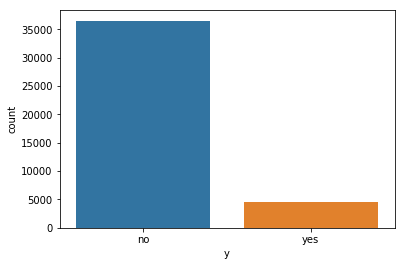

In [60]:
sns.countplot(x='y', data=df)

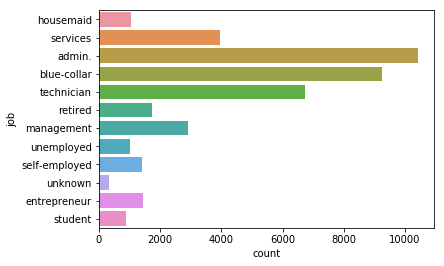

In [61]:
sns.countplot(y='job', data=df)

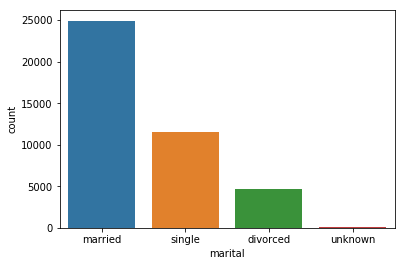

In [62]:
sns.countplot(x='marital', data=df)

In [63]:

df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

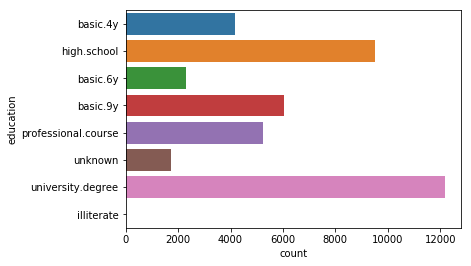

In [64]:
sns.countplot(y='education', data=df)

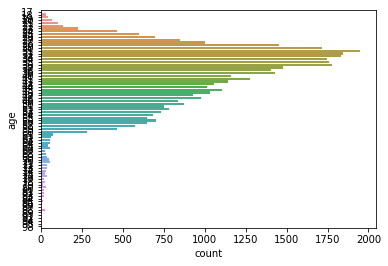

In [65]:
sns.countplot(y='age', data=df)

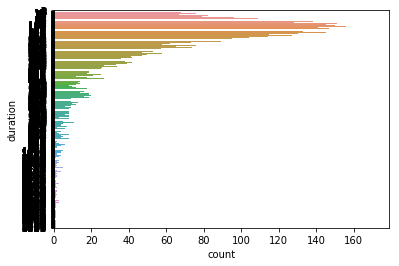

In [67]:
sns.countplot(y='duration', data=df)

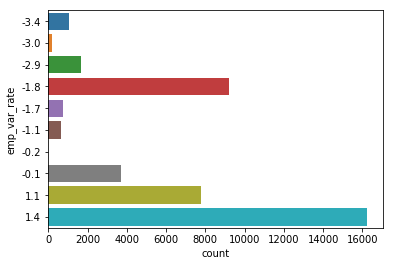

In [72]:
sns.countplot(y='emp_var_rate', data=df)

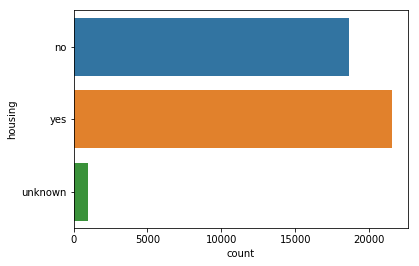

In [69]:
sns.countplot(y='housing', data=df)

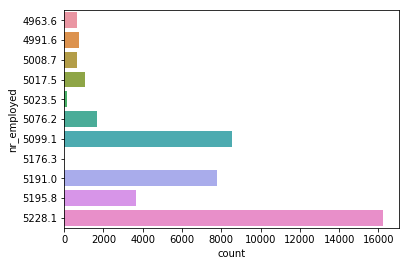

In [73]:

sns.countplot(y='nr_employed', data=df)

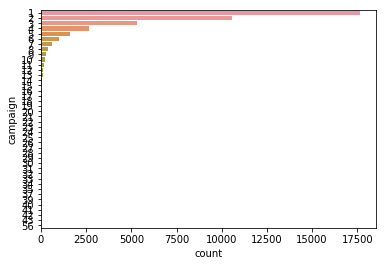

In [71]:
sns.countplot(y='campaign', data=df)

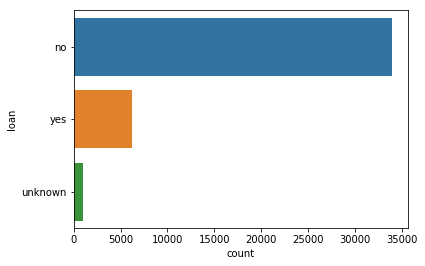

In [74]:
sns.countplot(y='loan', data=df)

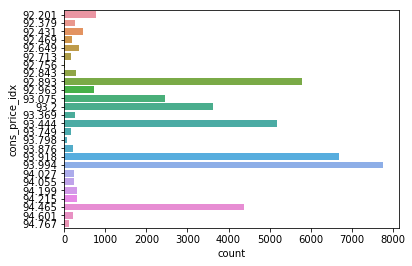

In [75]:
sns.countplot(y='cons_price_idx', data=df)

In [ ]:
sns.countplot(y='cons.conf.idx', data=df)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


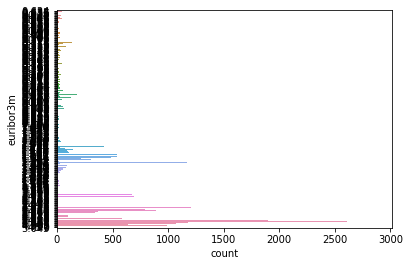

In [16]:
sns.countplot(y='euribor3m', data=df)

In [17]:
le = preprocessing.LabelEncoder()

In [76]:
df.job = le.fit_transform(df.job)

In [77]:
df.marital = le.fit_transform(df.marital)

In [78]:
df.education = le.fit_transform(df.education)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.poutcome = le.fit_transform(df.poutcome)
df.y=le.fit_transform(df.y)

In [79]:
df.head()

,age,job,marital,education,housing,loan,duration,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,3,1,0,0,0,261,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,149,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,2,0,226,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,151,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,2,307,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [80]:
X = df.iloc[:,0:15]
X[0:10]

,age,job,marital,education,housing,loan,duration,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,56,3,1,0,0,0,261,1,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,0,0,149,1,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,2,0,226,1,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,151,1,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,2,307,1,0,1,1.1,93.994,-36.4,4.857,5191.0
5,45,7,1,2,0,0,198,1,0,1,1.1,93.994,-36.4,4.857,5191.0
6,59,0,1,5,0,0,139,1,0,1,1.1,93.994,-36.4,4.857,5191.0
7,41,1,1,7,0,0,217,1,0,1,1.1,93.994,-36.4,4.857,5191.0
8,24,9,2,5,2,0,380,1,0,1,1.1,93.994,-36.4,4.857,5191.0
9,25,7,2,3,2,0,50,1,0,1,1.1,93.994,-36.4,4.857,5191.0


In [81]:
y = df.iloc[:,15]
y[0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: y, dtype: int64

In [82]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) 

In [83]:

x_train.shape, y_train.shape

((32950, 15), (32950,))

In [84]:
x_test.shape, y_test.shape

((8238, 15), (8238,))

In [85]:
model=LogisticRegression(penalty='l2', max_iter=1000)


In [86]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
prediction=model.predict(x_test)

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.91308570041272152

In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)


[[7140  179]
 [ 537  382]]


In [90]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [91]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [92]:
predict = rfc.predict(x_test)

In [93]:
accuracy_score(y_test, predict)


0.91223597960670066

In [94]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB(priors=None)

In [95]:
predict = clf.predict(x_test)

In [96]:
accuracy_score(y_test, predict)

0.83442583151250305

In [97]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [98]:
y_pred = classifier.predict(x_test) 

In [99]:
accuracy_score(y_test, y_pred)

0.90131099781500368

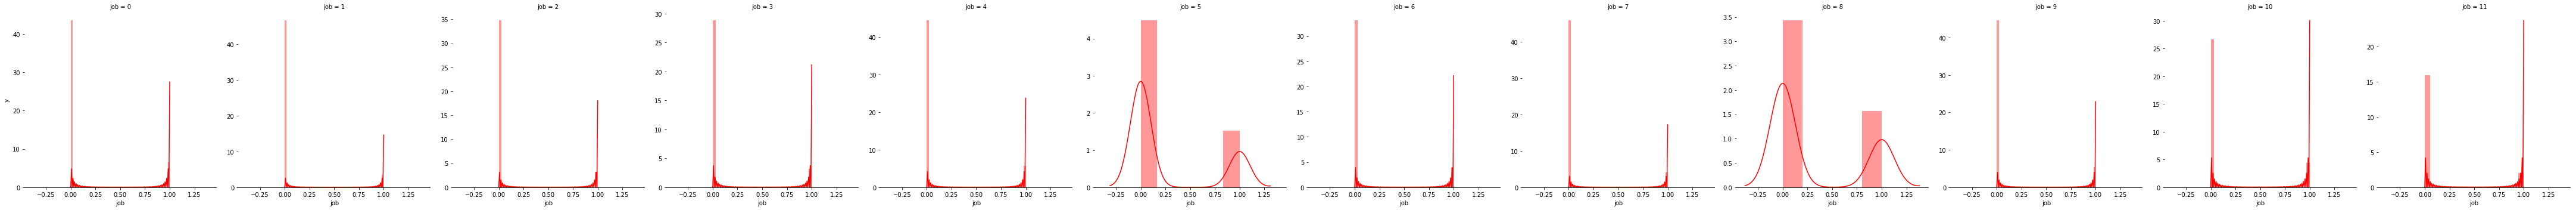

In [100]:
g = sns.FacetGrid(df, col="job",size= 5, sharey=False, sharex = True)
g.map(sns.distplot, "y", color = 'r');
g.set_axis_labels("job", "y");
g.despine(left=True)

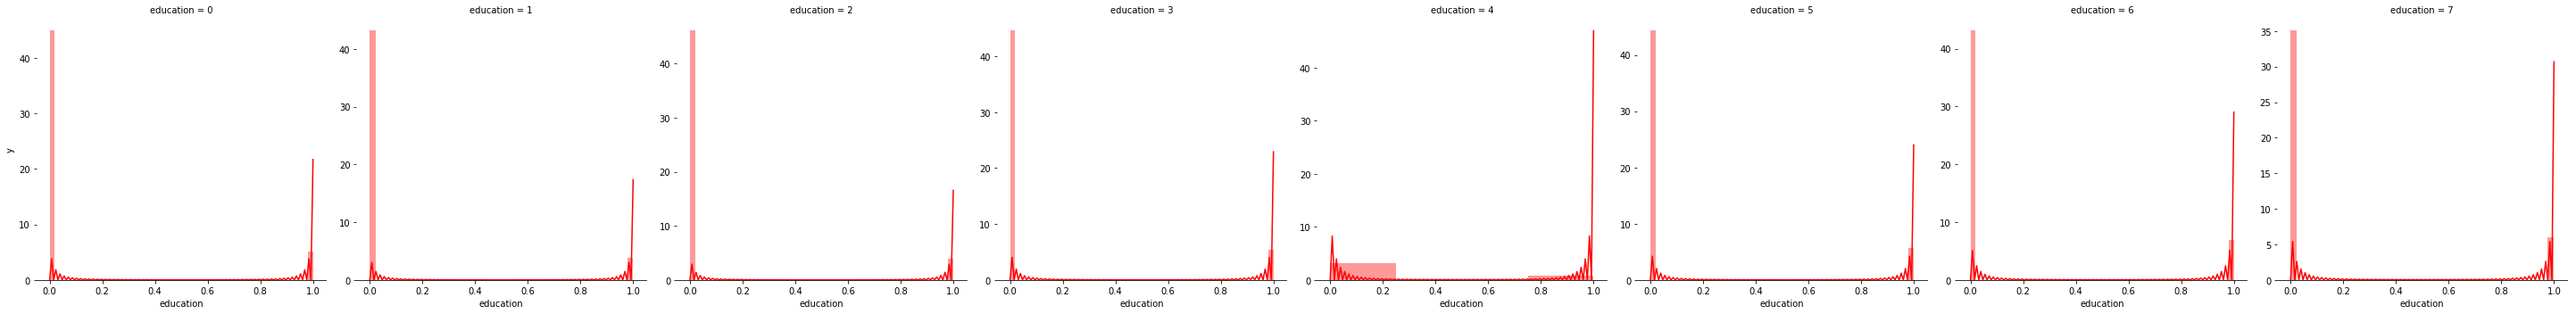

In [101]:
g = sns.FacetGrid(df, col="education",  size= 5, sharey=False, sharex = True)
g.map(sns.distplot, "y", color = 'r');
g.set_axis_labels("education", "y");
g.despine(left=True)

In [102]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [103]:
wml_credentials={
  "apikey": "x2QZ4alTRn02ppj2gbnVrDBOVcZTMJ8mgOQ8IISqN8TP",
    "instance_id": "69a91ab2-1457-4893-bd8c-31a85276e9ae",
  "password": "f761935a-1c34-40f2-8c9c-c22b3e2b248d",
  "url": "https://eu-gb.ml.cloud.ibm.com",
  "username": "cecf8cb0-749d-4d44-9d3c-580f4bc4fbcd"
}

In [104]:
client=WatsonMachineLearningAPIClient(wml_credentials)

In [105]:
model_props={
    client.repository.ModelMetaNames.AUTHOR_NAME:"SRUJANA",
    client.repository.ModelMetaNames.AUTHOR_EMAIL:"putchalasrujana1999@gmail.com",
        client.repository.ModelMetaNames.NAME:"Quest_Pirates final project"}
    

In [106]:
model_artifact=client.repository.store_model(model,meta_props=model_props)

In [107]:
published_model_uid=client.repository.get_model_uid(model_artifact)

In [108]:
published_model_uid

'edae2256-b404-4d25-9f9d-cbdeef04fe3d'

In [109]:
deploy=client.deployments.create(published_model_uid,name="y")



#######################################################################################

Synchronous deployment creation for uid: 'edae2256-b404-4d25-9f9d-cbdeef04fe3d' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='758617e0-b3a5-49d2-bb0e-9689ac253907'
------------------------------------------------------------------------------------------------




In [111]:
scoring_endpoint=client.deployments.get_scoring_url(deploy)

In [112]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/69a91ab2-1457-4893-bd8c-31a85276e9ae/deployments/758617e0-b3a5-49d2-bb0e-9689ac253907/online'